# Python Project
## Daniel Jackson
## August 23, 2023

Project Instructions: You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis (I am looking for data wrangling more than anything). 

Import libraries and CSV/Excel files we will be using:

In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pycountry

cost_of_living_df = pd.read_csv('cost_of_living.csv')
ds_salaries_df = pd.read_csv('ds_salaries.csv')
levels_salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')

# Used pip install pip install openpyxl to read in excel files into Python
country_codes_df = pd.read_excel('country_codes.xlsx')

In [390]:
# Run a code to find where our reference point cities will be. Need to figure out
coli_city_ref = cost_of_living_df[cost_of_living_df['Cost of Living Index'] == 100]
print(coli_city_ref['City'])

13    New York, NY, United States
Name: City, dtype: object


Let's say I am a intermediate level Data Scientist making $100,000 living in New York City (our reference point city). For example: If cost of living index is 120 somewhere, then cost of living is 20% higher than in  New York. If cost of living index is 80, then cost of living is 20% lower than in New York. Where is my money going the furthest?

In [391]:
# Let's look at cost_of_living_df
cost_of_living_df = cost_of_living_df.sort_values(by='City')
# Drop Rank column
cost_of_living_df.drop('Rank', axis=1, inplace=True)
cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
295,"Aachen, Germany",61.81,21.74,43.03,49.49,57.99,116.48
44,"Aalborg, Denmark",82.43,23.26,54.70,71.24,93.27,100.93
282,"Aberdeen, United Kingdom",63.40,23.06,44.49,47.87,77.47,102.02
367,"Abidjan, Ivory Coast",47.06,19.73,34.25,40.32,32.22,6.27
308,"Abu Dhabi, United Arab Emirates",57.89,91.80,73.79,49.79,58.49,75.22


In [392]:
# Create two new data frames for in and out of US (US cost and offshore cost)
substring = 'United States'
filter = cost_of_living_df['City'].str.contains(substring)
us_cost_of_living_df = cost_of_living_df[filter].copy()
off_cost_of_living_df = cost_of_living_df[~filter].copy()
us_cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
293,"Akron, OH, United States",62.20,22.90,43.78,63.55,55.56,102.89
167,"Albany, NY, United States",71.49,34.70,54.24,69.53,78.98,129.75
281,"Albuquerque, NM, United States",63.44,33.91,49.60,64.60,64.07,122.44
23,"Anchorage, AK, United States",91.23,39.29,66.88,97.95,78.76,118.63
190,"Ann Arbor, MI, United States",70.28,47.97,59.82,74.16,63.62,159.99


In [393]:
off_cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
295,"Aachen, Germany",61.81,21.74,43.03,49.49,57.99,116.48
44,"Aalborg, Denmark",82.43,23.26,54.70,71.24,93.27,100.93
282,"Aberdeen, United Kingdom",63.40,23.06,44.49,47.87,77.47,102.02
367,"Abidjan, Ivory Coast",47.06,19.73,34.25,40.32,32.22,6.27
308,"Abu Dhabi, United Arab Emirates",57.89,91.80,73.79,49.79,58.49,75.22


In [394]:
# Split city column into multiple columns: City, State, Country for US and City, Country for Offshore
us_cost_of_living_df[['City', 'State', 'Country']] = us_cost_of_living_df['City'].str.split(',',expand = True)
us_cost_of_living_df = us_cost_of_living_df.reset_index(drop = True)
off_cost_of_living_df[['City','Country']] = off_cost_of_living_df['City'].str.split(',', n = 1, expand = True)
us_cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,State,Country
0,Akron,62.20,22.90,43.78,63.55,55.56,102.89,OH,United States
1,Albany,71.49,34.70,54.24,69.53,78.98,129.75,NY,United States
2,Albuquerque,63.44,33.91,49.60,64.60,64.07,122.44,NM,United States
3,Anchorage,91.23,39.29,66.88,97.95,78.76,118.63,AK,United States
4,Ann Arbor,70.28,47.97,59.82,74.16,63.62,159.99,MI,United States


In [395]:
off_cost_of_living_df.head()

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
295,Aachen,61.81,21.74,43.03,49.49,57.99,116.48,Germany
44,Aalborg,82.43,23.26,54.70,71.24,93.27,100.93,Denmark
282,Aberdeen,63.40,23.06,44.49,47.87,77.47,102.02,United Kingdom
367,Abidjan,47.06,19.73,34.25,40.32,32.22,6.27,Ivory Coast
308,Abu Dhabi,57.89,91.80,73.79,49.79,58.49,75.22,United Arab Emirates


In [396]:
# Find means of each column for each data frame
us_avg = us_cost_of_living_df.mean(numeric_only = True)
print(us_avg)

Cost of Living Index               73.252000
Rent Index                         46.378105
Cost of Living Plus Rent Index     60.654421
Groceries Index                    74.003684
Restaurant Price Index             72.332842
Local Purchasing Power Index      117.364000
dtype: float64


In [397]:
off_avg = off_cost_of_living_df.mean(numeric_only = True)
print(off_avg)

Cost of Living Index              54.451263
Rent Index                        22.770518
Cost of Living Plus Rent Index    39.600870
Groceries Index                   49.547101
Restaurant Price Index            50.818219
Local Purchasing Power Index      62.484493
dtype: float64


In [398]:
# Find standard deviation of each column for each data frame
us_stand_dev = us_cost_of_living_df.std(numeric_only = True)
print(us_stand_dev)

Cost of Living Index               9.013655
Rent Index                        17.834354
Cost of Living Plus Rent Index    12.409951
Groceries Index                   11.454642
Restaurant Price Index             9.351185
Local Purchasing Power Index      21.621612
dtype: float64


In [399]:
off_stand_dev = off_cost_of_living_df.std(numeric_only = True)
print(off_stand_dev)

Cost of Living Index              22.076649
Rent Index                        15.074494
Cost of Living Plus Rent Index    18.020702
Groceries Index                   21.491912
Restaurant Price Index            26.598407
Local Purchasing Power Index      28.521335
dtype: float64


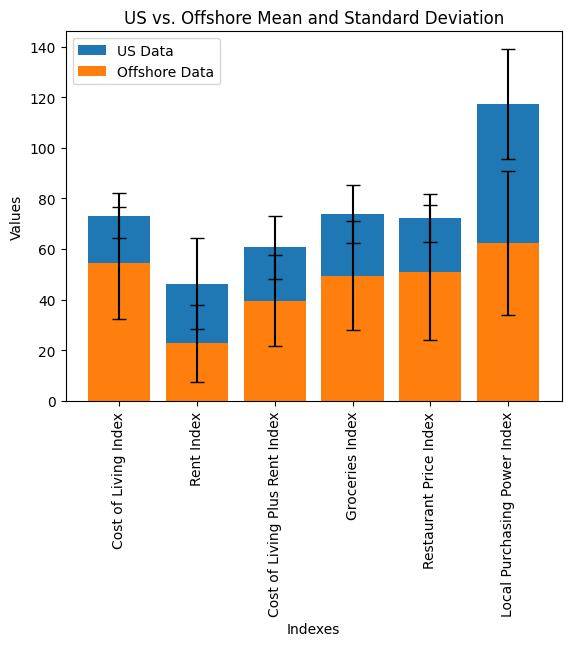

In [400]:
# Plot mean and standard deviation of both US and Offshore data sets
plt.bar(us_avg.index, us_avg.values, yerr = us_stand_dev, capsize = 5, label = 'US Data')
plt.bar(off_avg.index, off_avg.values, yerr = off_stand_dev, capsize = 5, label = 'Offshore Data')
plt.xlabel('Indexes')
plt.xticks(rotation = 90)
plt.ylabel('Values')
plt.title('US vs. Offshore Mean and Standard Deviation')
plt.legend()
plt.show()

The averages of each US index is higher than the averages of each Offshore index. The long bar in Local Purchasing power Index represents high variability compared to the shorter bars in the other indexes. The error bar only overlaps in Local Purchasing Power index, which indicates a very large difference between the means of the US and Offshore data.

### Let's merge the cost_of_living_df and the country_codes_df

In [401]:
def split_city(city):
    parts = city.split(',')
    if len(parts) == 3:
        return pd.Series(parts, index=['city', 'State', 'Country'])
    elif len(parts) == 2:
        return pd.Series(parts, index=['city', 'Country'])

# Apply the function to each row of the 'City' column
split_columns = cost_of_living_df['City'].apply(split_city)

# Concatenate the split columns with the original DataFrame
cost_of_living_df = pd.concat([cost_of_living_df, split_columns], axis=1)

# Drop the original 'City' column
cost_of_living_df.drop('City', axis=1, inplace=True)
cost_of_living_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Country,State
295,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,Germany,NaN
44,82.43,23.26,54.70,71.24,93.27,100.93,Aalborg,Denmark,NaN
282,63.40,23.06,44.49,47.87,77.47,102.02,Aberdeen,United Kingdom,NaN
367,47.06,19.73,34.25,40.32,32.22,6.27,Abidjan,Ivory Coast,NaN
308,57.89,91.80,73.79,49.79,58.49,75.22,Abu Dhabi,United Arab Emirates,NaN


In [402]:
# Change Country name to Country codes to make merge easier
def map_to_country_code(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_2
    except LookupError:
        return country_name  # Return original name if country code not found
# Make full country names to country codes using pycountry method we created
cost_of_living_df['Country'] = cost_of_living_df['Country'].apply(map_to_country_code)
cost_of_living_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Country,State
295,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN
44,82.43,23.26,54.70,71.24,93.27,100.93,Aalborg,DK,NaN
282,63.40,23.06,44.49,47.87,77.47,102.02,Aberdeen,GB,NaN
367,47.06,19.73,34.25,40.32,32.22,6.27,Abidjan,Ivory Coast,NaN
308,57.89,91.80,73.79,49.79,58.49,75.22,Abu Dhabi,AE,NaN


In [403]:
# Rename 'Country' to 'country_code' to merge after
new_col_name_1 = 'Alpha-2 code'
cost_of_living_df.rename(columns = {'Country': new_col_name_1}, inplace = True)
cost_of_living_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State
295,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN
44,82.43,23.26,54.70,71.24,93.27,100.93,Aalborg,DK,NaN
282,63.40,23.06,44.49,47.87,77.47,102.02,Aberdeen,GB,NaN
367,47.06,19.73,34.25,40.32,32.22,6.27,Abidjan,Ivory Coast,NaN
308,57.89,91.80,73.79,49.79,58.49,75.22,Abu Dhabi,AE,NaN


In [404]:
country_codes_df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [405]:
coli_codes_df = pd.merge(cost_of_living_df, country_codes_df, on = 'Alpha-2 code')
coli_codes_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,Alpha-3 code,Numeric
0,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,DEU,276
1,68.51,25.89,48.53,55.01,66.96,79.93,Augsburg,DE,NaN,Germany,DEU,276
2,68.94,38.59,54.71,56.41,61.05,105.86,Berlin,DE,NaN,Germany,DEU,276
3,71.08,30.96,52.27,53.92,73.85,95.72,Bonn,DE,NaN,Germany,DEU,276
4,62.24,23.82,44.23,48.69,61.63,77.06,Bremen,DE,NaN,Germany,DEU,276


In [406]:
# Merge coli_codes_pdf with ds_salaries_df
# First, need to filter out ds_salaries_df to only show data scientists, since that is what we are looking for in our analysis
ds_salaries_df = ds_salaries_df[ds_salaries_df['job_title'] == 'Data Scientist']
# 143 Observations
ds_salaries_df = ds_salaries_df.drop('Unnamed: 0', axis = 1)
ds_salaries_df = ds_salaries_df.reset_index(drop = True)
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
2,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
3,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
4,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


In [407]:
# Change 'employee_residence' to 'country_code' so we can merge
new_col_name = 'Alpha-2 code'
ds_salaries_df.rename(columns = {'employee_residence': new_col_name}, inplace = True)
ds_salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,Alpha-2 code,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
2,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
3,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
4,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


In [408]:
coli_codes_sal_df = pd.merge(coli_codes_df, ds_salaries_df, on = 'Alpha-2 code')
coli_codes_sal_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,2020,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,2020,EN,FT,Data Scientist,55000,EUR,62726,50,DE,S
2,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,2020,EN,FT,Data Scientist,43200,EUR,49268,0,DE,S
3,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,2021,MI,FT,Data Scientist,76760,EUR,90734,50,DE,L
4,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,2021,MI,FT,Data Scientist,52000,EUR,61467,50,AT,M


In [409]:
# Add new column, 'weighted_sal_usd' which is the weighted salary in USD dollars based on the cost of living index
coli_codes_sal_df['weighted_sal_usd'] = ((coli_codes_sal_df['Cost of Living Index']*coli_codes_sal_df['salary_in_usd'])/100).round()
coli_codes_sal_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,weighted_sal_usd
0,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,MI,FT,Data Scientist,70000,EUR,79833,0,DE,L,49345.0
1,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,EN,FT,Data Scientist,55000,EUR,62726,50,DE,S,38771.0
2,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,EN,FT,Data Scientist,43200,EUR,49268,0,DE,S,30453.0
3,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,MI,FT,Data Scientist,76760,EUR,90734,50,DE,L,56083.0
4,61.81,21.74,43.03,49.49,57.99,116.48,Aachen,DE,NaN,Germany,...,MI,FT,Data Scientist,52000,EUR,61467,50,AT,M,37993.0


In [410]:
# Plot the weighted income by each country
us_count = coli_codes_sal_df['Alpha-2 code'].value_counts()['US']
print('US count:', us_count)
off_count = len(coli_codes_sal_df['Alpha-2 code']) - us_count
print('Offshore count:', off_count)
# More US data than any other country

US count: 7410
Offshore count: 1340


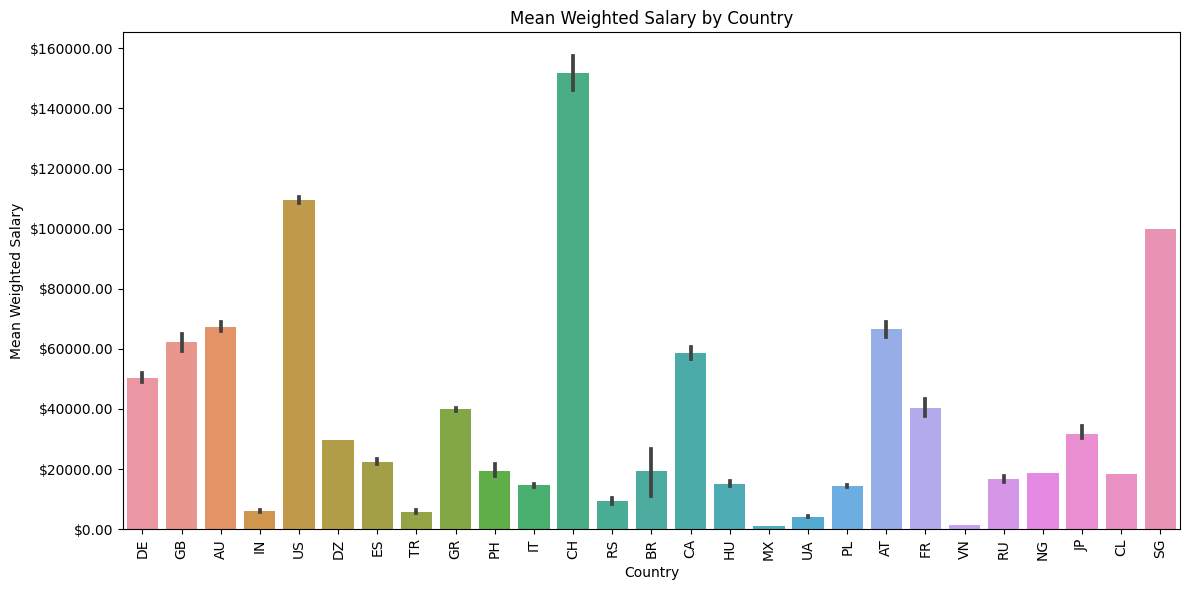

In [411]:
# Create barplot of Mean Weighted Salaries by country
country_mean_salary = coli_codes_sal_df.groupby('Alpha-2 code')['weighted_sal_usd'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x = 'Alpha-2 code', y = 'weighted_sal_usd', data = coli_codes_sal_df)
plt.xlabel('Country')
plt.ylabel('Mean Weighted Salary')
plt.title('Mean Weighted Salary by Country')
y_formatter = StrMethodFormatter("${x:.2f}")
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.xticks(rotation = 90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

### China has the highest mean weighted salary in USD, the US is second, and Singapore is third. These countries have relatively high salaries.

### Based on this bar plot, I will look at China, US and Singapore data to see what the top 5 places to live where my income will go the farthest.

In [412]:
# Filter the data so it only has China, US and Singapore Intermediate level data science jobs for Medium sized companies
condition1 = coli_codes_sal_df['Alpha-2 code'].isin(['CH', 'US', 'SG'])
condition2 = coli_codes_sal_df['experience_level'] == 'MI'
condition3 = coli_codes_sal_df['company_size'] == 'M'
subset_df = coli_codes_sal_df[condition1 & condition2 & condition3]
subset_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,weighted_sal_usd
981,62.2,22.9,43.78,63.55,55.56,102.89,Akron,US,OH,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,73396.0
983,62.2,22.9,43.78,63.55,55.56,102.89,Akron,US,OH,United States of America (the),...,MI,FT,Data Scientist,138350,USD,138350,100,US,M,86054.0
990,62.2,22.9,43.78,63.55,55.56,102.89,Akron,US,OH,United States of America (the),...,MI,FT,Data Scientist,150000,USD,150000,100,US,M,93300.0
1001,62.2,22.9,43.78,63.55,55.56,102.89,Akron,US,OH,United States of America (the),...,MI,FT,Data Scientist,130000,USD,130000,0,US,M,80860.0
1002,62.2,22.9,43.78,63.55,55.56,102.89,Akron,US,OH,United States of America (the),...,MI,FT,Data Scientist,90000,USD,90000,0,US,M,55980.0


In [413]:
print('There are',len(subset_df), 'observations in subset dataframe.')

There are 1141 observations in subset dataframe.


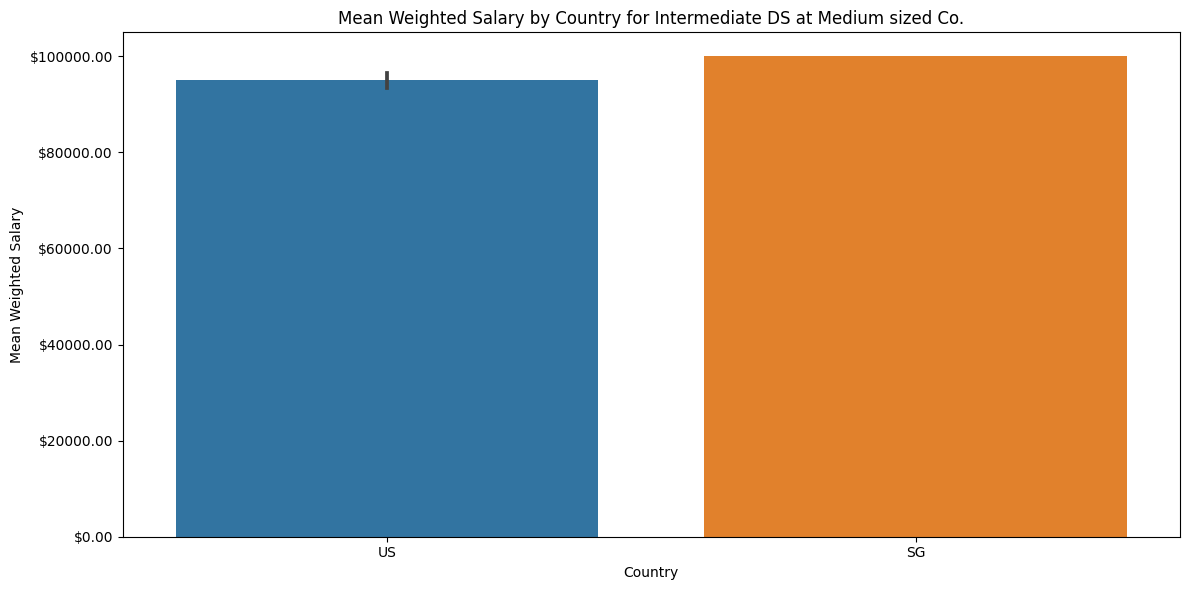

In [415]:
# Create barplot of Mean Weighted Salaries by country for Intermediate DS at Medium sized companies
country_mean_salary_subset = subset_df.groupby('Alpha-2 code')['weighted_sal_usd'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Alpha-2 code', y='weighted_sal_usd', data = subset_df)
plt.xlabel('Country')
plt.ylabel('Mean Weighted Salary')
plt.title('Mean Weighted Salary by Country for Intermediate DS at Medium sized Co.')
y_formatter = StrMethodFormatter("${x:.2f}")
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.tight_layout()

# Display the plot
plt.show()

### Only US and Singapore is in this data frame. Average weighted salaries are almost identical.

In [416]:
# Since New York COLI is 100, I do not want to be at or over 100. However, we do not want to be too low on the COLI, becuase quality of life could be affected. Let's subset data again to where COLI is lower than 100 but purchasing power is still over 100. And is not in New York
condition_1 = (subset_df['Cost of Living Index'] >= 70) & (subset_df['Cost of Living Index'] <= 80)
condition_2 = subset_df['Local Purchasing Power Index'] > 100
condition_3 = subset_df['State'].str.strip() != 'NY'

subset_df = subset_df[condition_1 & condition_2 & condition_3]
subset_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,weighted_sal_usd
1293,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,82930.0
1295,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,138350,USD,138350,100,US,M,97232.0
1302,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,150000,USD,150000,100,US,M,105420.0
1313,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,130000,USD,130000,0,US,M,91364.0
1314,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,90000,USD,90000,0,US,M,63252.0


In [417]:
print('There are',len(subset_df), 'observations in subset dataframe.')

There are 348 observations in subset dataframe.


In [418]:
# Filter out duplicate cities to see what we have left then we can rank those based COLI
filtered_df = subset_df.drop_duplicates(subset='city', keep='first')

filtered_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,weighted_sal_usd
1293,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,82930.0
1449,76.60,48.58,63.47,78.00,70.94,130.67,Atlanta,US,GA,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,90388.0
1605,73.56,41.68,58.61,74.65,73.38,136.13,Baltimore,US,MD,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,86801.0
2073,77.26,48.61,63.83,77.13,78.68,121.26,Charleston,US,SC,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,91167.0
2151,70.06,51.42,61.32,69.24,67.63,144.88,Charlotte,US,NC,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,82671.0


In [421]:
# Reset the index first
filtered_df = filtered_df.reset_index(drop = True)
filtered_df.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,city,Alpha-2 code,State,Country,...,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,weighted_sal_usd
0,70.28,47.97,59.82,74.16,63.62,159.99,Ann Arbor,US,MI,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,82930.0
1,76.60,48.58,63.47,78.00,70.94,130.67,Atlanta,US,GA,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,90388.0
2,73.56,41.68,58.61,74.65,73.38,136.13,Baltimore,US,MD,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,86801.0
3,77.26,48.61,63.83,77.13,78.68,121.26,Charleston,US,SC,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,91167.0
4,70.06,51.42,61.32,69.24,67.63,144.88,Charlotte,US,NC,United States of America (the),...,MI,FT,Data Scientist,118000,USD,118000,100,US,M,82671.0


In [422]:
# Find top 5 cities with higest COLI. We already set parameters on COLI and purchasing power index in this data frame and filitred properly based on our data scientist parameters
top_cities = filtered_df.nlargest(5, 'Cost of Living Index')[['city','State','Cost of Living Index', 'Local Purchasing Power Index']]
top_cities.head()

,city,State,Cost of Living Index,Local Purchasing Power Index
16,Los Angeles,CA,79.19,126.12
22,Philadelphia,PA,79.19,115.61
18,Minneapolis,MN,79.08,114.68
25,Sacramento,CA,77.88,101.43
3,Charleston,SC,77.26,121.26


The top 5 cities where my money as a Mid-level Data Scientist at a Medium sized company making $100,000 will go the farthest:

1. Los Angeles, CA
2. Philadelphia, PA
3. Minneapolis MN
4. Sacramento,CA
5. Charleston, SC

# Summary:
We ran a standard deviation test on both US and Offshore data from a macro-view and it looked like that the cost of living in the US was way higher than out of the US. But the local purchasing power index showed that people in the US are buying more goods compared to out of the US, meaning that those markets are more abundant in the US and quality of life is probably better. After setting the paramenters for what sort of Data Scientist that we are (in this case I was a Mid-level Data Scientist at a Medium-sized company making $100,000). The cost of living index was about 21% less than New York in the top city of Los Angeles but the purchasing power was 26% more than New York. Using those two indexes as my main points of emphasis, this is how I came to my conclusion of the top 5 cities where my money will go the farthest.